# Simuler data fra regresjonsmodellen $Y_i\sim N(\alpha+\beta x_i,\sigma^2x^2)$

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

alpha = 1.5
beta = 2.5
sigma = 1.0
n = 40 # antall observasjoner

x = np.random.uniform(0,1,size=n)  # simulerer x-verdier 
y = norm.rvs(alpha+beta*x,sigma*x)

# beregn estimatene for alpha, beta og sigma^2

alphaHat = (np.sum(y/(x**2))-(1/n)*np.sum(y/x)*np.sum(1/x)) / (np.sum(1/(x**2)) - (1/n)*(np.sum(1/x))**2)
betaHat = (1/n)*np.sum(y/x) - alphaHat*(1/n)*np.sum(1/x)
sigma2Hat = (1/n)*np.sum((y-alphaHat-betaHat*x)**2/(x**2))

print('alphaHat: ',alphaHat)
print('betaHat: ',betaHat)
print('sigma2Hat: ',sigma2Hat)

alphaHat:  1.511350336904712
betaHat:  2.633285913449165
sigma2Hat:  0.7602177189328665


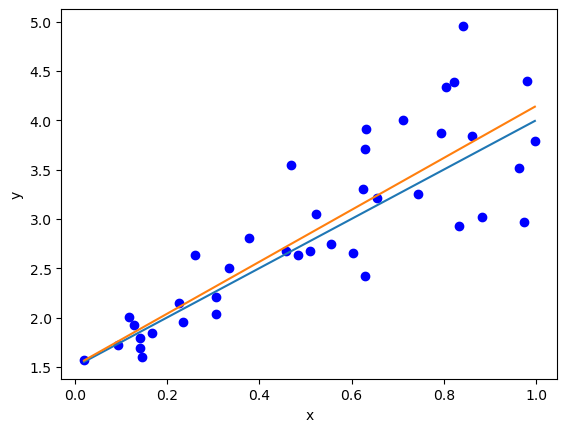

In [2]:
# Lag spredningsplott med inntegnet (ukjent) sann regresjonslinje og estimert regresjonslinje

plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([min(x),max(x)],[alpha+beta*min(x),alpha+beta*max(x)])  # plott sann regresjonslinje, blir blå
plt.plot([min(x),max(x)],[alphaHat+betaHat*min(x),alphaHat+betaHat*max(x)]) # plott estimert regresjonsliste, blir rød
plt.show()

# Bruk nå data simulert over, men tilpass en vanlig regresjonsmodell, dvs $Y_1,Y_2,\ldots,Y_n$ uavhengige og $Y_i\sim N(\alpha+\beta x_i,\sigma^2)$

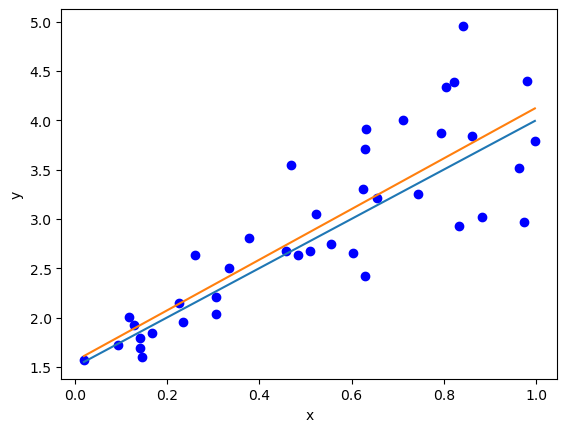

In [3]:
# beregn estimater for alpha og beta (merk at nå bruker vi formler utledet fra en vanlig regresjonsmodell)

xStrek = np.sum(x)/n
yStrek = np.sum(y)/n

betaHatVanlig = np.sum((x-xStrek)*y) / np.sum((x-xStrek)**2)
alphaHatVanlig = yStrek - betaHatVanlig * xStrek

# Lag spredningsplott med inntegnet (ukjent) sann regresjonslinje og estimert regresjonslinje

plt.plot(x,y,'bo')
plt.xlabel('x')
plt.ylabel('y')
plt.plot([min(x),max(x)],[alpha+beta*min(x),alpha+beta*max(x)])  # plott sann regresjonslinje, blir blå
plt.plot([min(x),max(x)],[alphaHatVanlig+betaHatVanlig*min(x),alphaHatVanlig+betaHatVanlig*max(x)]) # plott estimert regresjonsliste, blir rød
plt.show()

# Lag residualplott basert på en vanlig regresjonsmodell

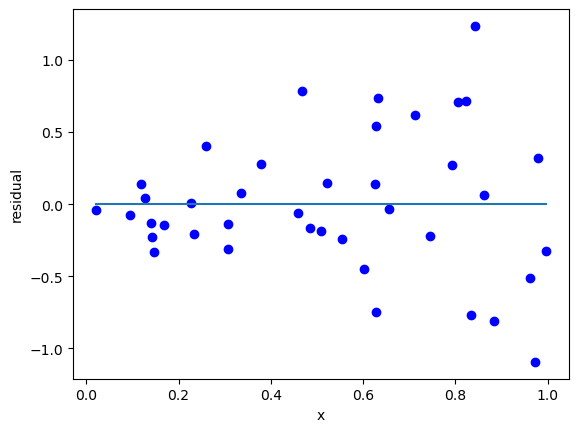

In [4]:
epsilonHatVanlig = y - alphaHatVanlig - betaHatVanlig * x

plt.plot(x,epsilonHatVanlig,'bo')
plt.xlabel('x')
plt.ylabel('residual')
plt.plot([min(x),max(x)],[0,0]) # trekk linje epsilon = 0
plt.show()

# Lag (modifisert) residualplott basert på den sanne regresjonsmodellen

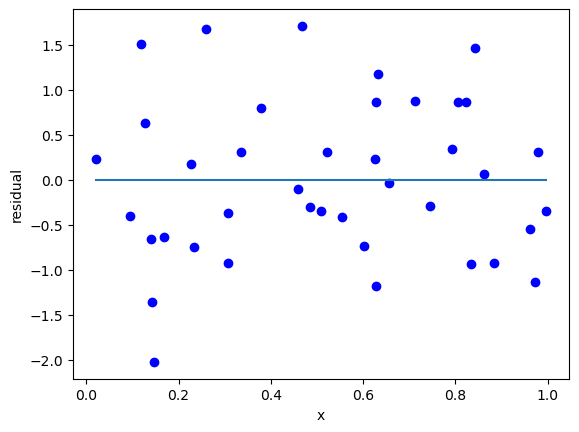

In [5]:
epsilonHat = (y - alphaHat - betaHat * x)/x

plt.plot(x,epsilonHat,'bo')
plt.xlabel('x')
plt.ylabel('residual')
plt.plot([min(x),max(x)],[0,0]) # trekk linje epsilon = 0
plt.show()

# Regn ut vektene $a_i$ foran $Y_i$ i uttrykket for $\hat{\alpha}$ (i modifisert modell)

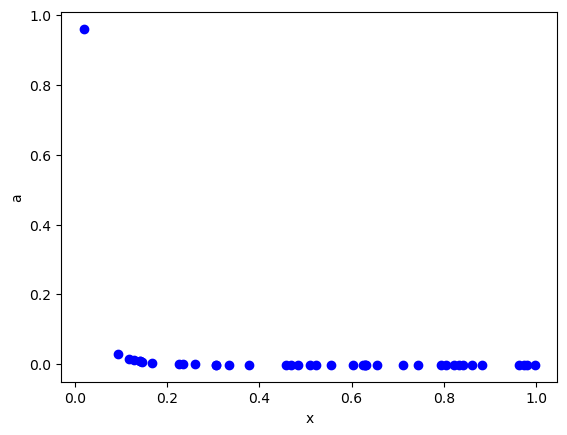

In [6]:
a = (1/(x**2) - (1/(n*x))*np.sum(1/x)) / (np.sum(1/(x**2)) - (1/n)*np.sum(1/x)**2)


plt.plot(x,a,'bo')
plt.xlabel('x')
plt.ylabel('a')
plt.show()

# Regn ut vektene $a_i$ foran $Y_i$ i uttrykket for $\hat{\alpha}$ (i vanlig modell)

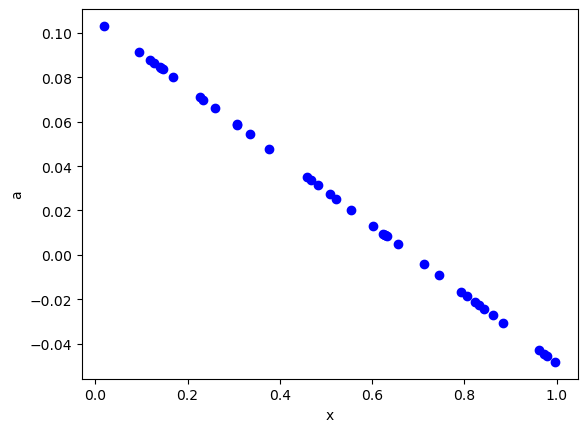

In [7]:
a = (1/n) - (x-xStrek)*xStrek/np.sum((x-xStrek)**2)

plt.plot(x,a,'bo')
plt.xlabel('x')
plt.ylabel('a')
plt.show()

# Regn ut $95\%$-konfidensintervall for $\alpha$ (basert på modifisert modell)

In [8]:
from scipy.stats import t

a = 0.05 # ønsker 95%-konfidensintervall
tAlphaHalve = t.ppf(1-a/2,n-2) # kvantil i t-fordelinga
s2 = n * sigma2Hat / (n-2) # estimat for sigma^2

sumEnOverX = np.sum(1/x)
sumEnOverX2 = np.sum(1/(x**2))

uttrykkInniKvadratrot = s2 * np.sum(((1/x) - sumEnOverX/n)**2) / ((sumEnOverX2 - sumEnOverX**2/n)**2)
nedreGrense = alphaHat - tAlphaHalve * np.sqrt(uttrykkInniKvadratrot)
ovreGrense = alphaHat + tAlphaHalve * np.sqrt(uttrykkInniKvadratrot)

print('95%-konfidensintervall for alpha: [',nedreGrense,',',ovreGrense,']')

95%-konfidensintervall for alpha: [ 1.4745954166428978 , 1.5481052571665264 ]
